# Sumário 
* gravar em um dataframe
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 
* Comparar resultados com artigo


In [6]:
import metrics as m
import cv2
from metrics import mse, dssim, lbp_tile_distance
import suport.patchesMethods as pm

In [7]:
sourcename = "1d798aa5d5"  #
sinName    = "1d798aa5d5_synthesis_2"  

In [8]:
original = f"tgs_salt\\{sourcename}.png"
sintese  = f"result\\{sinName}.jpg"

# load the two input images    0bdd44d530.png 1bd1c8c771 73be8191
imageA = cv2.imread(original,0)
imageB = cv2.imread(sintese,0)
if imageA is None or imageB is None:
    raise ValueError("Erro ao carregar as imagens. Verifique os caminhos.")


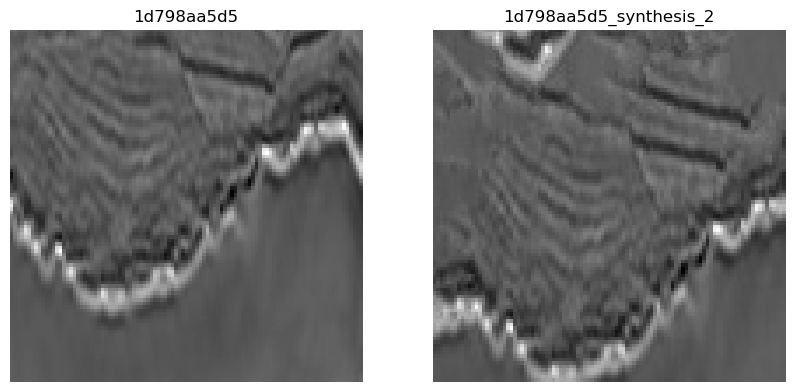

MSE        : 1064.0038231545927
LBP T Dist: 0.04990033706219706
DSSIM      : 0.3653160250767669


In [9]:
images = [imageA,imageB]
titles = [sourcename, sinName]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the DSSIM between the two images
s = dssim(imageA, imageB)


# print(f"Old DSSIM  : {oldssim}")  # Old DSSIM is not used in the current code

# compute LBP tile distance
lbp_tile_dist = lbp_tile_distance(imageA, imageB)

print(f"MSE        : {m}")
print(f"LBP T Dist: {lbp_tile_dist}")
print(f"DSSIM      : {s}")
